In [1]:
# Linear Radon transform modeling with a synthetic example.

using PyPlot, Seismic




In [2]:
# 1- Generate 2D seismic data with linear events

nt=250;
dt=0.004;
nx=30;
dx=5;

param = Dict(:nt=>nt, :dt=>dt,:nx1=>nx,:dx1=>dx, 
              :p1=>[0.0003, -0.0005, 0.000], :p2=>[0,0,0],:p3=>[0,0,0],:p4=>[0,0,0], 
              :tau=>[0.3, 0.4,0.5], :amp=>[ -1.0, 0.7,1],:f0=>20);


d,ext=SeisLinearEvents(;param...);

h = collect(0:nx-1)*dx;

# 2- Define linear moveouts p
pmin = -2*dt/dx;
pmax = 2*dt/dx;
np = 60
dp = (pmax-pmin)/(np-1)
p = collect(pmin:dp:pmax);


In [3]:
# 3- Transform to Radon domain

m = SeisRadonFreqInv(d, order="linear", dt=dt, h=h, p=p, flow=2, fhigh=80,
                     mu=0.00001 )

# 4- Transform back to data domain
d2 = SeisRadonFreqFor(m, nt, order="linear", dt=dt, h=h, p=p, flow=2, fhigh=80)

# 5- Calculate and print modeling error (%)
e2 = 100*(sum((d-d2).^2))/sum(d.^2);
println("Relative error = ", e2, " %") 


Relative error = 0.0005187653295872736 %


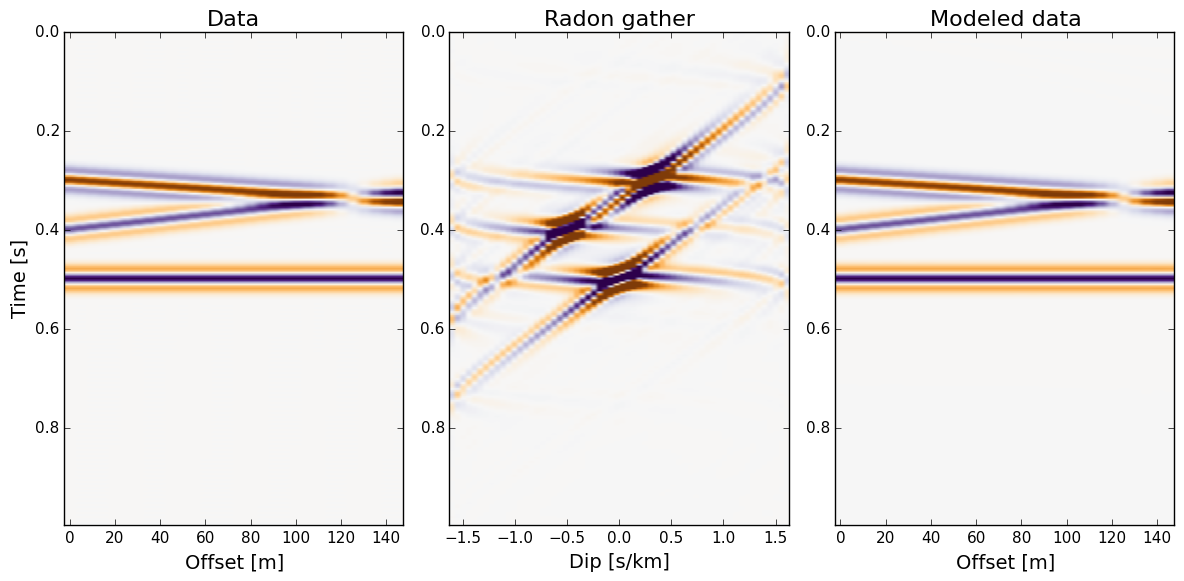

In [6]:
# 6- Plot input data, Radon gather, and modeled data 

figure(1, figsize=(12,6));
subplot(131)
SeisPlot(d, title="Data", xlabel="Offset [m]", ylabel="Time [s]", vmin=-1,vmax=1,
         ox=h[1], dx=dx, dy=dt, fignum=1)
subplot(132)
SeisPlot(m[1:nt, :], title="Radon gather", xlabel="Dip [s/km]",
         ox=p[1]*1000, dx=1000*(p[2]-p[1]), dy=dt, fignum=1)
subplot(133)
SeisPlot(d2, title="Modeled data", xlabel="Offset [m]", vmin = -1, vmax = 1,
         ox=h[1], dx=dx, dy=dt, fignum=1)

tight_layout()

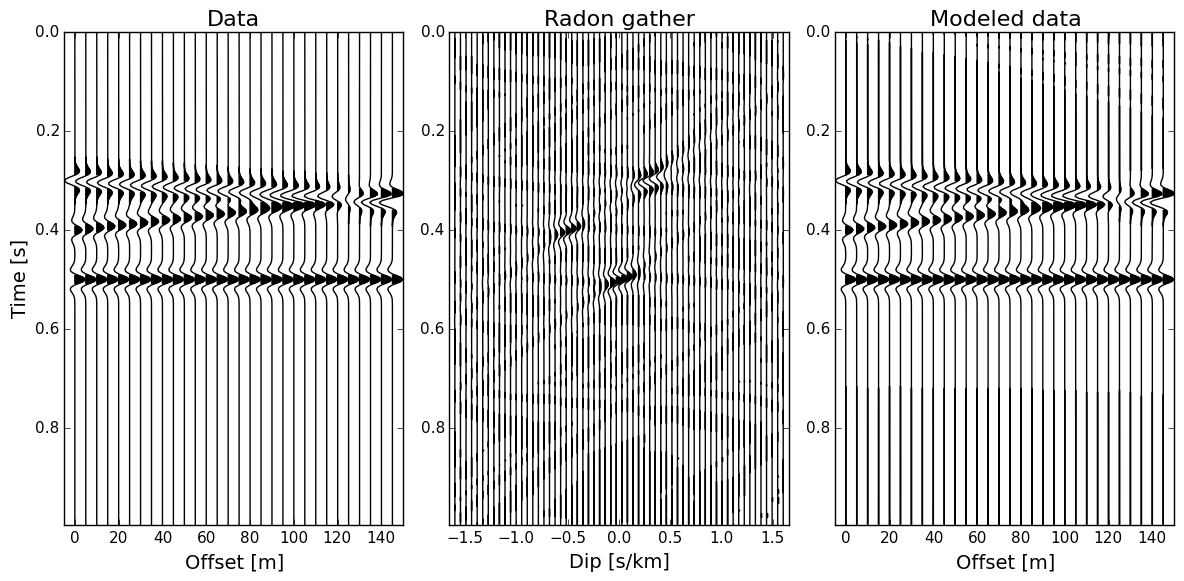

In [7]:
# 7- Plot input data, Radon gather and modeled data,  wiggle in style

figure(1, figsize=(12,6));
subplot(131)
SeisPlot(d, title="Data", style="wiggles", xlabel="Offset [m]", ylabel="Time [s]", ox=h[1], dx=dx, dy=dt, fignum=1)
subplot(132)
SeisPlot(m[1:nt, :], style="wiggles",  title="Radon gather", xlabel="Dip [s/km]", ox=1000*p[1], dx=1000*(p[2]-p[1]), dy=dt, fignum=1)
subplot(133)
SeisPlot(d2, style="wiggles", title="Modeled data", xlabel="Offset [m]",ox=h[1], dx=dx, dy=dt, fignum=1)

tight_layout()